This notebook will take two genes and plot their RNA/protein correlations from each other.


In [11]:
import pandas as pd
import seaborn as sns
from predict_protein import download_cptac_original_order, select_features, train_model, utils

get_dataframe = utils.get_dataframe

In [12]:
single = get_dataframe('/Volumes/Ginkgo_Data/Data/2021-11_CPTACTrainedModels/out3/tumor8_elastic_single.p')
corum = get_dataframe('/Volumes/Ginkgo_Data/Data/2021-11_CPTACTrainedModels/out3/tumor8_elastic_corum.p')

print(single)
print(corum)

single = single.rename(columns={'corr_test': 'single_corr'})
corum = corum.rename(columns={'corr_test': 'corum_corr'})

         corr_train  corr_test  r2_train   r2_test  num_obs  num_features  \
A1BG       0.092082   0.064152 -0.009648 -0.009665     1029             1   
A2M        0.436315   0.443702  0.189651  0.181852     1029             1   
A2ML1      0.553134   0.547139 -0.094819 -0.147834      425             1   
AAAS       0.222295   0.353371  0.037319  0.094279     1029             1   
AACS       0.592287   0.592484  0.291195  0.270834     1029             1   
...             ...        ...       ...       ...      ...           ...   
ZNF836     0.287891   0.374026  0.075610  0.111702      105             1   
ZNF85      0.000000   0.000000 -0.124018 -0.099983      120             1   
ZNF880     0.141690   0.137788 -0.013896 -0.062180      141             1   
ZNF91      0.282376   0.414741 -0.012681 -0.069850      136             1   
ZSCAN5A    0.221589   0.185659 -0.103776 -0.207500       76             1   

            nrmse  baseline_nrmse  
A1BG     0.475251        0.474436  
A2M

In [13]:
combined = single[['single_corr', 'num_obs', 'num_features']].merge(corum[['corum_corr']], left_index=True, right_index=True)
combined['diff'] = combined.corum_corr - combined.single_corr

In [14]:
proteins_of_interest = list(combined[(combined['diff'] > 0.2) & (combined['num_obs'] >= 1)].index)
len(proteins_of_interest)
print(proteins_of_interest)

['ACIN1', 'ACTB', 'ACTG1', 'ACTN1', 'ACTN4', 'ACTR2', 'ACTR3', 'AFF4', 'AGT', 'AIMP1', 'ANAPC10', 'ANXA2', 'AP1S1', 'AP2M1', 'AP3M1', 'AP4B1', 'AP5M1', 'AP5S1', 'AP5Z1', 'API5', 'APOA1', 'APOL1', 'AQR', 'ARID4B', 'ARPC3', 'ARPC4', 'ARPC5', 'ASCC1', 'ASCC2', 'ATP6V1A', 'AXIN1', 'BAG6', 'BANF1', 'BBS1', 'BBS7', 'BCAS2', 'BCL6', 'BECN1', 'BLOC1S1', 'BOD1L1', 'BORCS5', 'BORCS6', 'BORCS8', 'BRD4', 'BRD8', 'BRMS1', 'BUD13', 'BUD31', 'CAPN1', 'CAPZB', 'CCDC22', 'CCDC93', 'CCNH', 'CCNT2', 'CCT5', 'CCT7', 'CD2BP2', 'CDC40', 'CDC5L', 'CDK11B', 'CDK12', 'CDK9', 'CENPB', 'CENPC', 'CHD4', 'CHERP', 'CLTC', 'CMC1', 'CNOT10', 'CNOT3', 'COG1', 'COG2', 'COG4', 'COG7', 'COG8', 'COL18A1', 'COMMD3', 'COMMD5', 'COMMD7', 'COMMD8', 'COMMD9', 'COPS7A', 'COPS8', 'CPSF3', 'CPSF6', 'CREBBP', 'CRNKL1', 'CSDE1', 'CTC1', 'CTNNB1', 'CTNNBL1', 'CTR9', 'CWC15', 'CWC22', 'CXXC1', 'DAD1', 'DAG1', 'DAP3', 'DDX17', 'DDX21', 'DDX23', 'DDX39B', 'DDX3X', 'DDX41', 'DDX5', 'DHX15', 'DHX8', 'DHX9', 'DICER1', 'DLG4', 'DMAP1', 'DN

In [15]:
cptac_list = download_cptac_original_order.download_cptac(n_tumors=8)
tumor_df = pd.concat(cptac_list)
tm = train_model.LearnCPTAC(tumor_df)


cptac warning: transcriptomics data was not found for the following samples, so transcriptomics data columns were filled with NaN for these samples: C3L-00563.N, C3L-00605.N, C3L-00769.N, C3L-00770.N, C3L-00771.N, C3L-00930.N, C3L-00947.N, C3L-00963.N, C3L-01246.N, C3L-01249.N, C3L-01252.N, C3L-01256.N, C3L-01257.N, C3L-01744.N, C3N-00200.N, C3N-00729.N, C3N-01211.N, NX1.N, NX10.N, NX11.N, NX12.N, NX13.N, NX14.N, NX15.N, NX16.N, NX17.N, NX18.N, NX2.N, NX3.N, NX4.N, NX5.N, NX6.N, NX7.N, NX8.N, NX9.N (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac_original_order.py, line 38)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01OV002, 01OV008, 01OV010, 01OV013, 01OV019, 01OV045, 01OV046, 01OV049, 02OV035, 02OV040, 02OV042, 02OV045, 04OV041, 11OV009, 13OV004, 17OV019, 17OV034, 22OV001, 26OV010 (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac_ori

In [62]:
# Good combinations
# g1 = 'CMC1'
# g2 = 'MT-CO1'
# g1 = 'PCCB'
# g2 = 'PCCA'
# g1 = 'PSMG2'
# g2 = 'PSMG1'
# g1 = 'SMCR8'
# g2 = 'C9orf72'

# Revision
#g1 = 'MICU2'
#g2 = 'MCU'

# g1 = 'PPP3R1'
# g2 = 'PPP3CA'

plot_df = tm.df[[ g1 + '_proteomics', g1 + '_transcriptomics', g2+ '_proteomics', g2 + '_transcriptomics']]

plot_df

Name,MAGEC1_proteomics,MAGEC1_transcriptomics,MAGEA4_proteomics,MAGEA4_transcriptomics
Patient_ID,,,,
OV01OV002,NaN,NaN,NaN,NaN
OV01OV007,NaN,-0.394723,-1.746725,NaN
OV01OV008,NaN,-0.755360,NaN,-0.550875
OV01OV010,NaN,0.755081,NaN,-0.696662
OV01OV013,NaN,-0.392784,NaN,0.191895
...,...,...,...,...
LSC3N-03886.N,-7.3226,NaN,-7.322600,NaN
LSC3N-04124.N,-3.3783,NaN,-3.919200,NaN
LSC3N-04127.N,-3.1493,NaN,-4.168900,NaN


In [63]:
g1_p = plot_df[g1 + '_proteomics']
g1_t = plot_df[g1 + '_transcriptomics']
g2_p = plot_df[g2 + '_proteomics']
g2_t = plot_df[g2 + '_transcriptomics']

print('P1 to T1', g1_p.corr(g1_t))
print('P2 to T2', g2_p.corr(g2_t))

print('P1 to P2', g1_p.corr(g2_p))
print('T1 to T2', g1_t.corr(g2_t))

print('P1 to T2', g1_p.corr(g2_t))
print('P2 to T1', g2_p.corr(g1_t))

P1 to T1 0.4365408429875485
P2 to T2 0.40422851054298237
P1 to P2 0.8101734795002523
T1 to T2 0.3846742426482707
P1 to T2 0.6944315746119076
P2 to T1 0.26650621604325486


In [64]:
plot_df.corr()

Name,MAGEC1_proteomics,MAGEC1_transcriptomics,MAGEA4_proteomics,MAGEA4_transcriptomics
Name,,,,
MAGEC1_proteomics,1.000000,0.436541,0.810173,0.694432
MAGEC1_transcriptomics,0.436541,1.000000,0.266506,0.384674
MAGEA4_proteomics,0.810173,0.266506,1.000000,0.404229
MAGEA4_transcriptomics,0.694432,0.384674,0.404229,1.000000


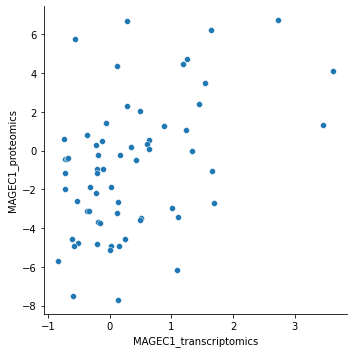

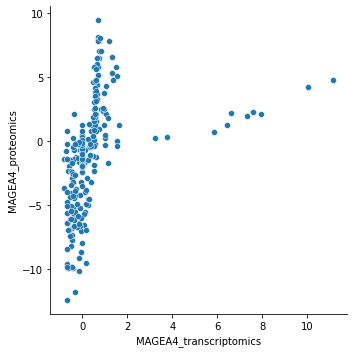

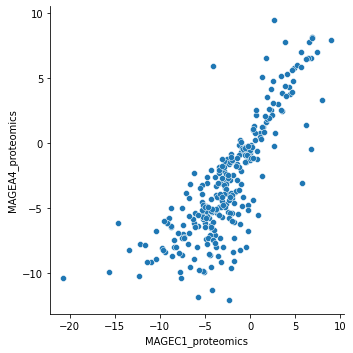

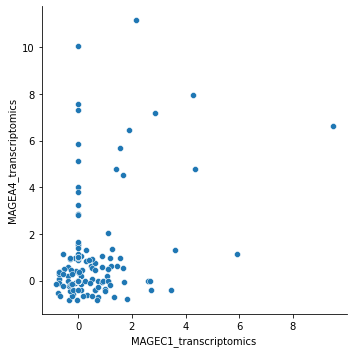

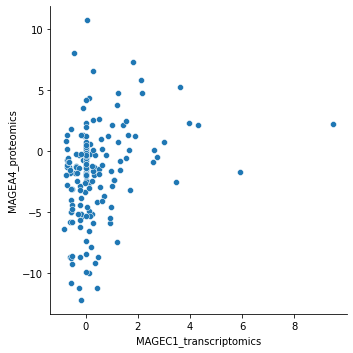

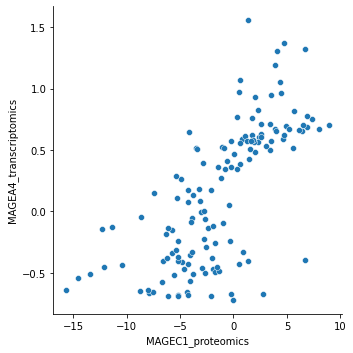

In [65]:
sns.relplot(data = plot_df,
            x= g1 + '_transcriptomics',
            y = g1 + '_proteomics')

sns.relplot(data = plot_df,
            x= g2 + '_transcriptomics',
            y = g2 + '_proteomics')

sns.relplot(data = plot_df,
            x= g1 + '_proteomics',
            y = g2 + '_proteomics')

sns.relplot(data = plot_df,
            x= g1 + '_transcriptomics',
            y = g2 + '_transcriptomics')

sns.relplot(data = plot_df,
            x= g1 + '_transcriptomics',
            y = g2 + '_proteomics')

sns.relplot(data = plot_df,
            x= g1 + '_proteomics',
            y = g2 + '_transcriptomics')

In [35]:
plot_df.to_csv(f'06_PlotRNAProteinCorrelations_Output/{g1}_{g2}_out3.csv', index=False)